## 0.0 IMPORTS

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


## 0.1 CARREGANDO DATASET

In [2]:
df = pd.read_csv('doencacoracao.csv')

## 0.2 ANALISE EXPLORATORIA

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [5]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
df.nunique()

Age                         42
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

Eu utilizo um loop for para percorrer os atributos e classificá-los como categóricos ou numéricos, dependendo do número de itens únicos por atributo.

In [8]:
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 5:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

numeric_columns = numeric_columns[1:]

In [9]:
print('itens numericos: ',numeric_columns)
print('itens categoricos: ',categoric_columns)

itens numericos:  ['BP', 'Cholesterol', 'Max HR', 'ST depression']
itens categoricos:  ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']


Eu converto a coluna numerica em float64 para analisar.

In [10]:
df[numeric_columns] = df[numeric_columns].astype('float64')

In [11]:
df1 = df[numeric_columns]

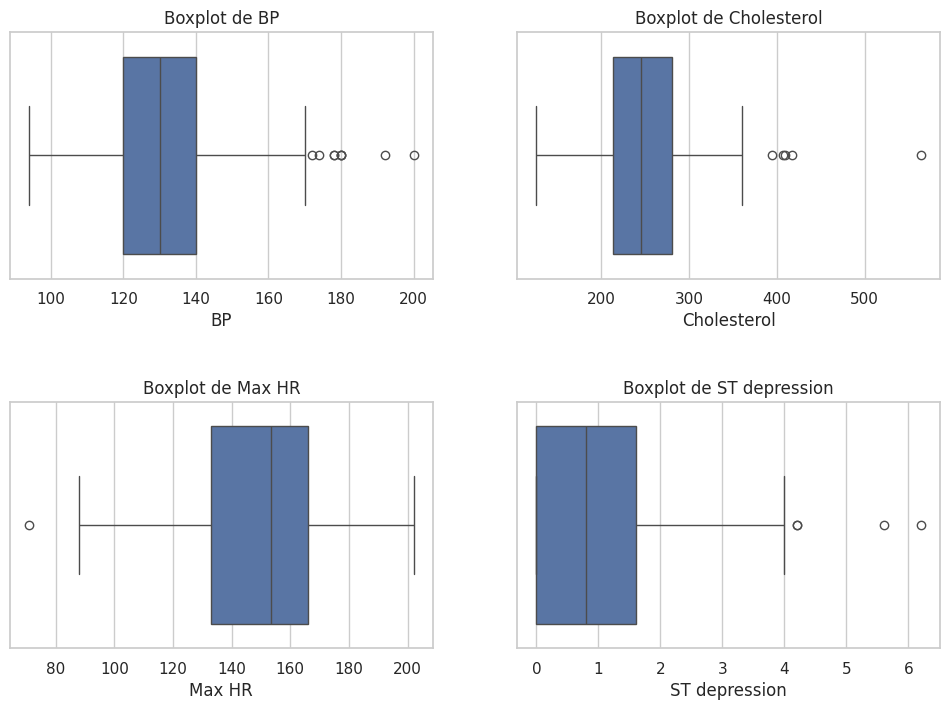

In [12]:
sns.set(style="whitegrid")
fig, eixos = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

# Usando df1 (apenas colunas numéricas) para os boxplots
for i, coluna in enumerate(df1.columns):
    linha = i // 2
    coluna_num = i % 2
    sns.boxplot(x=df1[coluna], ax=eixos[linha, coluna_num])
    eixos[linha, coluna_num].set_title(f"Boxplot de {coluna}")
plt.savefig("boxplot1.png")
plt.show()


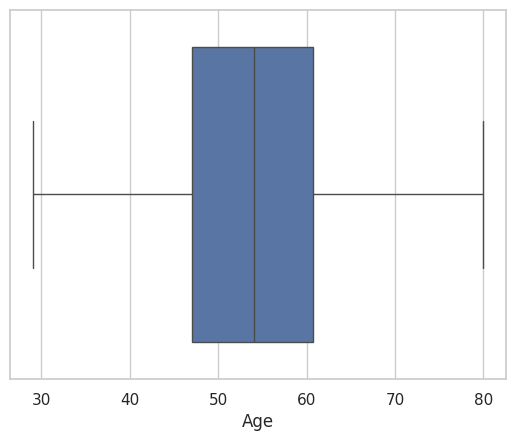

In [13]:
sns.boxplot(x=df['Age'])
plt.savefig("boxplot2.png")
plt.show()

### insights obtidos.
* O batimento cardiaco esta concentrado entre 120BPM a 140BPM. Também notamos que existe outliers acima de 170BPM
* Colesterol concentrado entre 200 a 300, havendo outliers acima de 400.
* A frequencia maxima cardiaco esta entre 130 a 170.
* A drepressão do segmento ST esta concentrada entre 0 e 2, havendo outliers acima de 4.
* Conseguimos notar que a idade esta concentrada entre 48 anos a 62 anos.

## 0.3 PREPARANDO OS DADOS

Irei fazer o import do LabelEncoder para facilitar meu trabalho.

In [14]:
from sklearn.preprocessing import LabelEncoder  # Importa a classe LabelEncoder do módulo de pré-processamento do scikit-learn

label_encoder = LabelEncoder()  # Cria um objeto da classe LabelEncoder para codificar rótulos

df = df.copy()  # Faz uma cópia do DataFrame original para evitar modificações acidentais

for column in df.columns:  # Itera por cada coluna do DataFrame
    if df[column].dtype == 'object':  # Verifica se o tipo de dado da coluna é 'object' (categorias, strings)
        df[column] = label_encoder.fit_transform(df[column])  # Aplica a codificação de rótulos na coluna

df.head()  # Exibe as primeiras 5 linhas do DataFrame resultante


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130.0,322.0,0,2,109.0,0,2.4,2,3,3,1
1,80,0,3,115.0,564.0,0,2,160.0,0,1.6,2,0,7,0
2,55,1,2,124.0,261.0,0,0,141.0,0,0.3,1,0,7,1
3,65,1,4,128.0,263.0,0,0,105.0,1,0.2,2,1,7,0
4,45,0,2,120.0,269.0,0,2,121.0,1,0.2,1,1,3,0


Tambem importo o StandardScaler para tratar as colunas numericas.

In [15]:
from sklearn.preprocessing import StandardScaler  # Importa a classe StandardScaler para padronização de dados

scaler = StandardScaler()  # Cria um objeto da classe StandardScaler

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])  # Padroniza as colunas numéricas


Verificando se tudo deu certo com df.head()

In [16]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,-0.075410,1.402212,0,2,-1.759208,0,1.181012,2,3,3,1
1,80,0,3,-0.916759,6.093004,0,2,0.446409,0,0.481153,2,0,7,0
2,55,1,2,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,1,0,7,1
3,65,1,4,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,2,1,7,0
4,45,0,2,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,1,1,3,0


## VERIFICANDO O MELHOR MODELO.


Eu dividi o conjunto de dados em X (preditores) e y (alvo). O alvo, neste caso, é a coluna 'Heart Disease', que indica a presença ou ausência de doença cardíaca.

In [17]:
X = df.drop(columns='Heart Disease')
y = df['Heart Disease']

In [18]:
from sklearn.model_selection import train_test_split

# dividimos os dados em treinamente o teste. ( 80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Criando um dicionario para classificar os modelos.

In [19]:
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
   }

Irei utilizar um loop for para percorrer cada modelo de classificação, fazer ajustes necessarios, imprimir a pontução e, em seguida, anexar os resuldados para me ajudar a determinar o melhor modelo.


In [20]:
model_names = []
accuracies = []

for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

Logistic Regression accuracy: 0.93
K-Nearest Neighbors accuracy: 0.76
Support Vector Machine accuracy: 0.72
Decision Tree accuracy: 0.67
Random Forest accuracy: 0.87
Gradient Boosting accuracy: 0.80
AdaBoost accuracy: 0.85
Gaussian Naive Bayes accuracy: 0.91
XGBoost accuracy: 0.81


O modelo com melhor resultado foi Logistic Regression, pode ser o mais eficaz para esta tarefa.

In [21]:

import plotly.express as px
import plotly
df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

fig = px.bar(df, x='Model', y='Accuracy', title='Model Accuracies')
fig.write_image("accuracies_bar_chart.png")
fig.show()


Eu ajustei (treinei) o modelo de Regressão Logística aos dados de treinamento e o utilizei para fazer previsões nos dados de teste para a variável alvo 'Heart Disease' (Doença Cardíaca).

In [22]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_score = logreg.score(X_test, y_test)
y_pred = logreg.predict(X_test)

## EVOLUINDO O MODELO

O Score do modelo pronto para uso é 92.5

In [23]:
logreg_score

0.9259259259259259

utilizo a matrix de confusão para fazer a verificação.

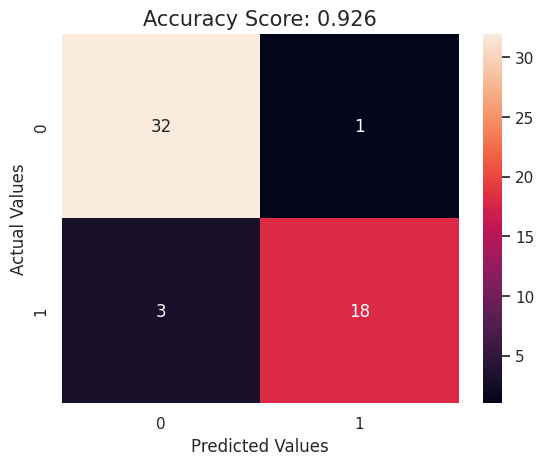

In [24]:
from sklearn.metrics import confusion_matrix as cm

score = round(accuracy_score(y_test, y_pred), 3)
cm1 = cm(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.savefig("accuracy.png")
plt.show()

A matrix de confusão nos mostrou que houve 3 falsos negativos e um (1) falso positivo.